## netid:
### dannic3, meichen6,renjunl2
## name:
### Danni Chen, Meichen Zhang, Renjun Li

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

import math

# Q1 


## a


In [8]:
def put_black_scholes(S0, K, T, r, div, sigma):
    
    cdf_mean = 0.0
    cdf_sd = 1.0
    
    d1 = (np.log(S0 / K) + (r - div + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - div - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = S0 * np.exp(-div* T) * st.norm.cdf(-d1, cdf_mean, cdf_sd) 
    put = -put + K * np.exp(-r * T) * st.norm.cdf(-d2, cdf_mean, cdf_sd) 

    return put

In [9]:
bsc_value= put_black_scholes(100,95, 0.2, 0.1, 0, 0.3)
bsc_value

2.434794560673378

### b CRRE

In [11]:
def CRRE(S0, K, T, r, sigma, start_step, N):
    crr_result=[]   

    option_value=np.zeros([N+1,N+1])
   
    stock_value=np.zeros([N+1,N+1])    

    for n in range(start_step,N,1):
        delta = T/n
        u = np.exp(sigma*np.sqrt(delta))
        d = 1/u
        qu = (np.exp(r*delta)-d)/(u-d)
        qd = 1-qu
        j = n 
        for i in range(0,j+1):
            stock_value[j,i] = S0*(u**i)*(d**(j-i))
            option_value[j,i] = np.maximum(-stock_value[j,i]+K,0)
        for j in range(n-1,-1,-1):
            for i in range(j,-1,-1):
                pv = np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i])
                option_value[j,i] = pv
        output ={"num_steps":n, "CRR":option_value[0,0]}
        crr_result.append(output)
    
    return crr_result
    
    



In [12]:
result_crre = CRRE(100, 95, 0.2, 0.1, 0.3, 50, 1001)


In [13]:
result_crre


[{'num_steps': 50, 'CRR': 2.451898255907282},
 {'num_steps': 51, 'CRR': 2.4333271964404624},
 {'num_steps': 52, 'CRR': 2.452584668387836},
 {'num_steps': 53, 'CRR': 2.429904739762511},
 {'num_steps': 54, 'CRR': 2.4529687866394068},
 {'num_steps': 55, 'CRR': 2.4265517850546057},
 {'num_steps': 56, 'CRR': 2.453094482325261},
 {'num_steps': 57, 'CRR': 2.423270112712191},
 {'num_steps': 58, 'CRR': 2.4529987709291996},
 {'num_steps': 59, 'CRR': 2.4200605238702217},
 {'num_steps': 60, 'CRR': 2.4527130261826584},
 {'num_steps': 61, 'CRR': 2.4169230815577207},
 {'num_steps': 62, 'CRR': 2.452263952245115},
 {'num_steps': 63, 'CRR': 2.4187628218933575},
 {'num_steps': 64, 'CRR': 2.451674367328094},
 {'num_steps': 65, 'CRR': 2.4222286981544134},
 {'num_steps': 66, 'CRR': 2.4509638393933417},
 {'num_steps': 67, 'CRR': 2.4253175214824796},
 {'num_steps': 68, 'CRR': 2.4501492049580382},
 {'num_steps': 69, 'CRR': 2.4280674028721663},
 {'num_steps': 70, 'CRR': 2.449244994888031},
 {'num_steps': 71, 'C

In [14]:
df_crre = pd.DataFrame.from_dict(result_crre)
df_crre['error_CRRE'] = bsc_value - df_crre["CRR"]
df_crre.head()


,CRR,num_steps,error_CRRE
0,2.451898,50,-0.017104
1,2.433327,51,0.001467
2,2.452585,52,-0.017790
3,2.429905,53,0.004890
4,2.452969,54,-0.018174


In [15]:
df_crre.to_csv("data/crre.csv", index=False)

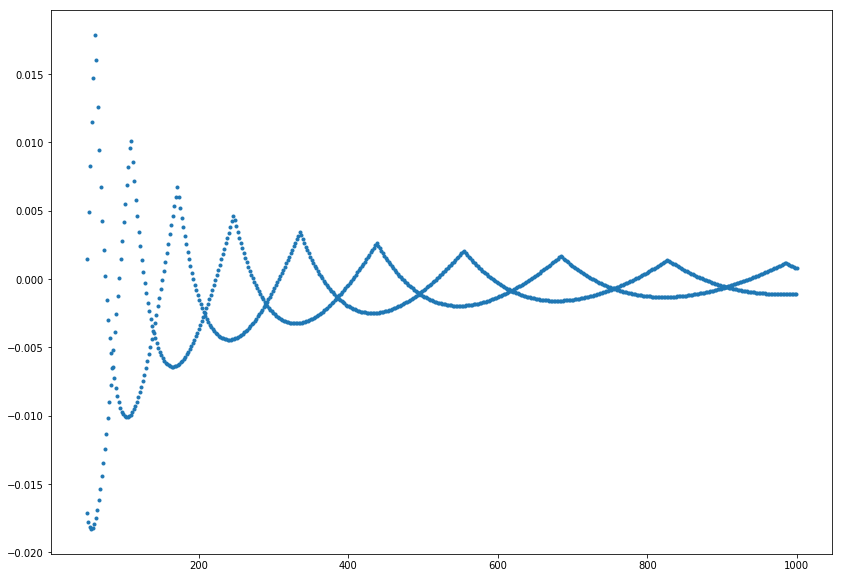

In [16]:
plt.figure(figsize=(14,10))
plt.plot(df_crre['num_steps'], df_crre['error_CRRE'], 'o', markersize=3)
plt.savefig('imgs/crr.png')
plt.show()

## R&B

In [17]:
def RB(S0, K, T, r, sigma, start_step, N, div):
    rb_result=[]   

    option_value=np.zeros([N+1,N+1])
   
    stock_value=np.zeros([N+1,N+1])    

    for n in range(start_step,N,1):
        delta = T/n
        u = np.exp((r-div-0.5*sigma**2)*delta+ sigma*delta**0.5)
        d = np.exp((r-div-0.5*sigma**2)*delta- sigma*delta**0.5)
        qu = (np.exp(r*delta)-d)/(u-d)
        qd = 1-qu
        j = n 
        for i in range(0,j+1):
            stock_value[j,i] = S0*(u**i)*(d**(j-i))
            option_value[j,i] = np.maximum(-stock_value[j,i]+K,0)
        for j in range(n-1,-1,-1):
            for i in range(j,-1,-1):
                pv = np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i])
                option_value[j,i] = pv
        output ={"num_steps":n, "RB":option_value[0,0]}
        rb_result.append(output)
    
    return rb_result


In [18]:
result_rb = RB(100, 95, 0.2, 0.1, 0.3, 50, 1001, 0)

In [19]:
df_rb = pd.DataFrame.from_dict(result_rb)

In [20]:
df_rb['error_rb'] = bsc_value - df_rb["RB"]
df_rb.head()
df_rb.tail()

,RB,num_steps,error_rb
946,2.435576,996,-0.000781
947,2.434883,997,-0.000088
948,2.435597,998,-0.000802
949,2.434838,999,-0.000044
950,2.435617,1000,-0.000822


In [23]:
df_rb.to_csv("data/rb.csv", index=False)

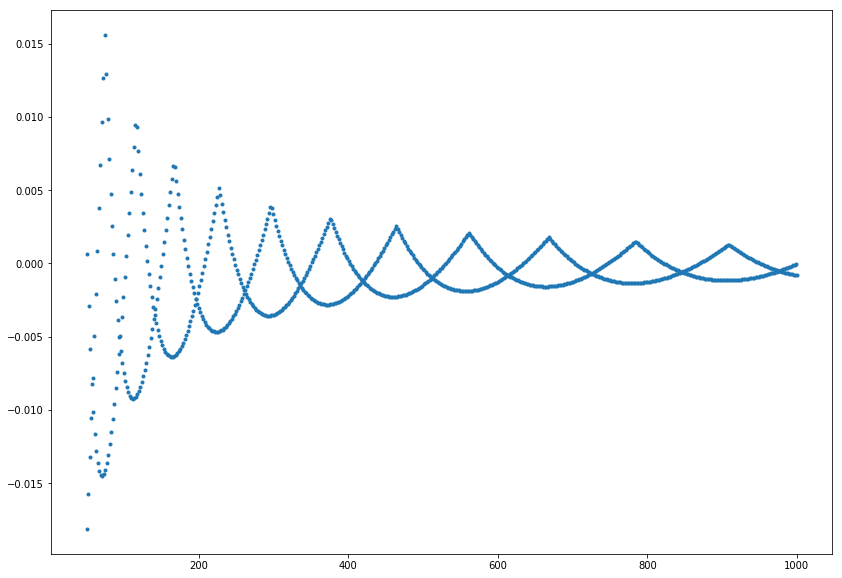

In [24]:
plt.figure(figsize=(14,10))
plt.plot(df_rb['num_steps'], df_rb['error_rb'], 'o', markersize=3)
plt.savefig('imgs/rb.png')
plt.show()

## LR



In [2]:
class StockOption(object):

    def __init__(self, S0, K, r, T, N, params):
        self.S0 = S0
        self.K = K
        self.r = r
        self.T = T
        self.N = max(1, N) # Ensure N have at least 1 time step
        self.STs = None  # Declare the stock prices tree
        
        """ Optional parameters used by derived classes """
        self.pu = params.get("pu", 0)  # Probability of up state
        self.pd = params.get("pd", 0)  # Probability of down state
        self.div = params.get("div", 0)  # Dividend yield
        self.sigma = params.get("sigma", 0)  # Volatility
        self.is_call = params.get("is_call", True)  # Call or put
        self.is_european = params.get("is_eu", True)  # Eu or Am

        """ Computed values """
        self.dt = T/float(N)  # Single time step, in years
        self.df = math.exp(
            -(r-self.div) * self.dt)  # Discount factor

In [3]:
class BinomialTreeOption(StockOption):

    def _setup_parameters_(self):
        self.u = 1 + self.pu  # Expected value in the up state
        self.d = 1 - self.pd  # Expected value in the down state
        self.qu = (math.exp((self.r-self.div)*self.dt) -
                   self.d)/(self.u-self.d)
        self.qd = 1-self.qu

    def _initialize_stock_price_tree_(self):
        # Initialize a 2D tree at T=0
        self.STs = [np.array([self.S0])]

        # Simulate the possible stock prices path
        for i in range(self.N):
            prev_branches = self.STs[-1]
            st = np.concatenate((prev_branches*self.u,
                                 [prev_branches[-1]*self.d]))
            self.STs.append(st)  # Add nodes at each time step

    def _initialize_payoffs_tree_(self):
        # The payoffs when option expires
        return np.maximum(
            0, (self.STs[self.N]-self.K) if self.is_call
            else (self.K-self.STs[self.N]))

    def __check_early_exercise__(self, payoffs, node):
        early_ex_payoff = \
            (self.STs[node] - self.K) if self.is_call \
            else (self.K - self.STs[node])

        return np.maximum(payoffs, early_ex_payoff)

    def _traverse_tree_(self, payoffs):
        for i in reversed(range(self.N)):
            # The payoffs from NOT exercising the option
            payoffs = (payoffs[:-1] * self.qu +
                       payoffs[1:] * self.qd) * self.df

            # Payoffs from exercising, for American options
            if not self.is_european:
                payoffs = self.__check_early_exercise__(payoffs, 
                                                        i)
        return payoffs

    def __begin_tree_traversal__(self):
        payoffs = self._initialize_payoffs_tree_()
        return self._traverse_tree_(payoffs)

    def price(self):
        self._setup_parameters_()
        self._initialize_stock_price_tree_()
        payoffs = self.__begin_tree_traversal__()

        return payoffs[0]

In [4]:

class BinomialLROption(BinomialTreeOption):

    def _setup_parameters_(self):
        odd_N = self.N if (self.N%2 == 1) else (self.N+1)
        d1 = (math.log(self.S0/self.K) +
              ((self.r-self.div) +
               (self.sigma**2)/2.) *
              self.T) / (self.sigma * math.sqrt(self.T))
        d2 = (math.log(self.S0/self.K) +
              ((self.r-self.div) -
               (self.sigma**2)/2.) *
              self.T) / (self.sigma * math.sqrt(self.T))
        pp_2_inversion = \
            lambda z, n: \
            .5 + math.copysign(1, z) * \
            math.sqrt(.25 - .25 * math.exp(
                -((z/(n+1./3.+.1/(n+1)))**2.)*(n+1./6.)))
        pbar = pp_2_inversion(d1, odd_N)

        self.p = pp_2_inversion(d2, odd_N)
        self.u = 1/self.df * pbar/self.p
        self.d = (1/self.df - self.p*self.u)/(1-self.p)
        self.qu = self.p
        self.qd = 1-self.p

In [5]:
lr_result = []
for n in range(50, 1001):
    pv = BinomialLROption(100, 95, 0.1, 0.2 ,n,{"sigma": 0.3, "is_call": False, "is_eu": True})
    lr_result.append(pv.price())

In [6]:
df_lr = pd.DataFrame.from_dict(lr_result)


In [10]:
df_lr_error = bsc_value - df_lr
df_lr_error.head()

,0
0,0.078711
1,0.000056
2,0.075893
3,0.000052
4,0.073272


In [11]:
df_lr.to_csv("data/lr.csv", index=False)

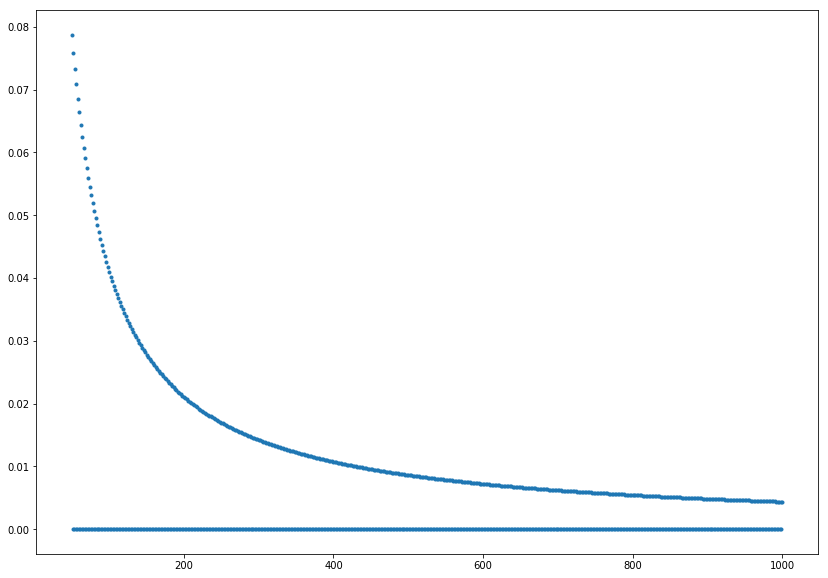

In [207]:
plt.figure(figsize=(14,10))
plt.plot(list(range(50,1001)), df_lr_error, 'o', markersize=3)
plt.savefig('imgs/lr.png')
plt.show()

## d
### When compared to the Black-Scholes price, we can see that the error calculated by Leisen and Reimer method is smoothly converged while the other two methohs are not.

## e

In [31]:
result_crre_e = CRRE(100, 95, 0.2, 0.1, 0.3, 24, 501)

In [32]:
df_crre_e = pd.DataFrame.from_dict(result_crre_e)
df_crre_e['error_crr'] = bsc_value - df_crre_e["CRR"]


crre_n= df_crre_e.loc[[1,26,76,126,176,226],]
crre_n

,CRR,num_steps,error_lr
1,2.476954,25,-0.042160
26,2.451898,50,-0.017104
76,2.430650,100,0.004145
126,2.440373,150,-0.005578
176,2.438441,200,-0.003647
226,2.430937,250,0.003857


In [33]:
crre_m =df_crre_e.loc[[26,76,176,276,376,476],] 
crre_m

,CRR,num_steps,error_lr
26,2.451898,50,-0.017104
76,2.430650,100,0.004145
176,2.438441,200,-0.003647
276,2.437281,300,-0.002486
376,2.435196,400,-0.000401
476,2.436019,500,-0.001224


In [46]:
crre = [2*b-a for a, b in zip(crre_n["CRR"], crre_m["CRR"])]
error_crre = crre - bsc_value
error_crre

array([-0.00795253, -0.02539379,  0.01143823, -0.00060579, -0.00284442,
        0.00630617])

In [48]:
result_rb_e = RB(100, 95, 0.2, 0.1, 0.3, 24, 501,0)

In [49]:
df_rb_e = pd.DataFrame.from_dict(result_rb_e)
df_rb_e['error_rb'] = bsc_value - df_rb_e["RB"]


rb_n= df_rb_e.loc[[1,26,76,126,176,226],]
rb_n

,RB,num_steps,error_rb
1,2.469722,25,-0.034928
26,2.452934,50,-0.018139
76,2.442257,100,-0.007463
126,2.434953,150,-0.000158
176,2.437868,200,-0.003073
226,2.438033,250,-0.003239


In [50]:
rb_m =df_rb_e.loc[[26,76,176,276,376,476],] 
rb_m

,RB,num_steps,error_rb
26,2.452934,50,-0.018139
76,2.442257,100,-0.007463
176,2.437868,200,-0.003073
276,2.431455,300,0.003339
376,2.437000,400,-0.002206
476,2.435169,500,-0.000375


In [52]:
rb = [2*b-a for a, b in zip(rb_n["RB"], rb_m["RB"])]
error_rb = rb - bsc_value
error_rb

array([ 0.00135102, -0.00321394, -0.00131568, -0.00683727,  0.00133829,
       -0.00248894])

In [12]:
lr_result2 = []
for n in range(24, 505):
    pv = BinomialLROption(100, 95, 0.1, 0.2 ,n,{"sigma": 0.3, "is_call": False,"is_eu": True})
    lr_result2.append(pv.price())

In [13]:
df_lr_e = pd.DataFrame.from_dict(lr_result2)
df_lr_ee = bsc_value - df_lr_e


lr_n= df_lr_e.loc[[27,77,127,177,227],]
lr_n

,0
27,2.434739
77,2.434780
127,2.434788
177,2.434791
227,2.434792


In [14]:
lr_m =df_lr_e.loc[[77,177,277,377,477],] 
lr_m

,0
77,2.434780
177,2.434791
277,2.434793
377,2.434794
477,2.434794


In [15]:
numstep_n = [51 ,101, 151,201,251]
numstep_m = [101, 201, 301, 401 ,501]
df_step_n = pd.DataFrame.from_dict(numstep_n)
df_step_m = pd.DataFrame.from_dict(numstep_m)

In [16]:
lr = [(float(c)**2*a-float(d)**2*b)/(float(c)**2-float(d)**2) for a, b, c, d in zip(lr_n[0], lr_m[0],df_step_n[0],df_step_m[0])]
error_lr = lr - bsc_value
error_lr

array([-3.33844626e-07, -4.40348398e-08, -1.32852853e-08, -5.65251090e-09,
       -2.91111757e-09])

## As the results show, the method by extrapolating with N and M steps give us more accurate option values than simply using a lattice with M timesteps with smaller error. Because the error depends on the number of steps M*N which is smaller than the original error.

# Q2

In [20]:
def CRRA(S0, K, T, r, sigma, n):
    crr_result=[] 

    option_value=np.zeros([n+1,n+1])
   
    stock_value=np.zeros([n+1,n+1])    

    
    delta = T/n
    u = np.exp(sigma*np.sqrt(delta))
    d = 1/u
    qu = (np.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    j = n 
    for i in range(0,j+1):
        stock_value[j,i] = S0*(u**i)*(d**(j-i))
        option_value[j,i] = np.maximum(-stock_value[j,i]+K,0)
    for j in range(n-1,-1,-1):
        for i in range(j,-1,-1):
            pv = max(np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i]),K-S0*u**i*(d**(j-i)))
            option_value[j,i] = pv
            output ={"num_steps":n, "CRR":option_value[0,0]}
    crr_result.append(output)
    
    
    return crr_result
    
    

In [21]:
Q2_a = CRRA(100, 95,0.2,0.1,0.3,10001)

In [22]:
a = Q2_a[0]["CRR"]
a

2.519006148877244

In [42]:
def BD(S0, K, T, r, sigma, start_step, N):
    crr_result=[]  
    cdf_mean = 0.0
    cdf_sd = 1.0
    option_value=np.zeros([N+1,N+1])
   
    stock_value=np.zeros([N+1,N+1])    

    for n in range(start_step,N,1):
        delta = T/n
        d1 = (np.log(S0 / K) + (r - 0 + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S0 / K) + (r - 0 - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        u = np.exp(sigma*np.sqrt(delta))
        d = 1/u
        qu = (np.exp(r*delta)-d)/(u-d)
        qd = 1-qu
        j = n 
        for i in range(0,j+1):
            stock_value[j,i] = S0*(u**i)*(d**(j-i))
            option_value[j,i] = np.maximum(-stock_value[j,i]+K,0)
            option_value[j-1, i] = max(K*np.exp(-r*delta)*st.norm.cdf(-d2, cdf_mean, cdf_sd)-S0*u**i*(d**(j-i))*st.norm.cdf(-d1, cdf_mean, cdf_sd),K-S0*u**i*(d**(j-i)))
        for j in range(n-2,-1,-1):
            for i in range(j,-1,-1):
                pv = max(np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i]),K-S0*u**i*(d**(j-i)))
                option_value[j,i] = pv
        output ={"num_steps":n, "CRR":option_value[0,0]}
        crr_result.append(output)
    
    return crr_result

In [153]:
BD = BD(100, 95, 0.2, 0.1, 0.3, 50, 1001)

In [228]:
df_bd = pd.DataFrame.from_dict(BD)
df_bd['error_bd'] =-a + df_bd["CRR"]
df_bd.head()

,CRR,num_steps,error_bd
0,3.858603,50,1.339597
1,3.867341,51,1.348335
2,3.849297,52,1.330291
3,3.852058,53,1.333052
4,3.839794,54,1.320788


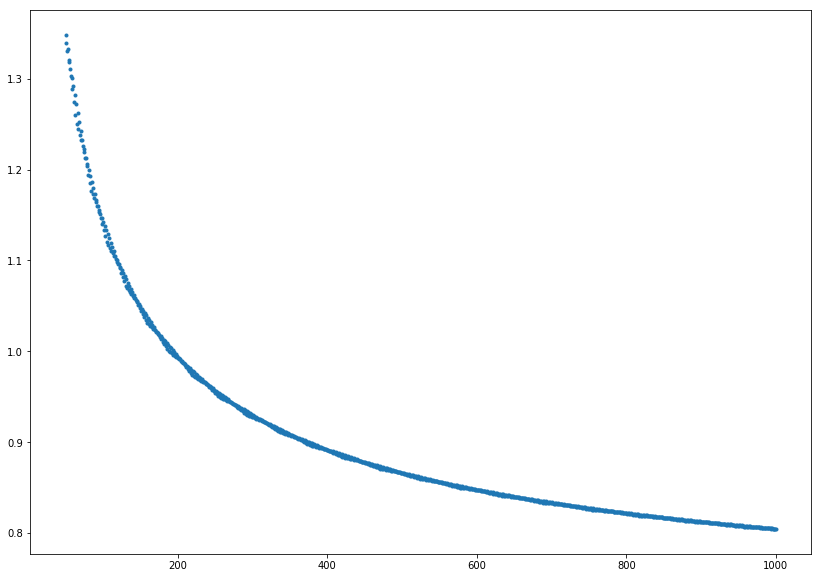

In [229]:
plt.figure(figsize=(14,10))
plt.plot(df_bd['num_steps'], df_bd['error_bd'], 'o', markersize=3)
plt.savefig('imgs/bdng')
plt.show()

In [25]:
def CRRA(S0, K, T, r, sigma, start_step, N):
    crr_result=[]   

    option_value=np.zeros([N+1,N+1])
   
    stock_value=np.zeros([N+1,N+1])    

    for n in range(start_step,N,1):
        delta = T/n
        u = np.exp(sigma*np.sqrt(delta))
        d = 1/u
        qu = (np.exp(r*delta)-d)/(u-d)
        qd = 1-qu
        j = n 
        for i in range(0,j+1):
            stock_value[j,i] = S0*(u**i)*(d**(j-i))
            option_value[j,i] = np.maximum(-stock_value[j,i]+K,0)
        for j in range(n-1,-1,-1):
            for i in range(j,-1,-1):
                pv = max(np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i]), K-S0*u**i*(d**(j-i)))
                option_value[j,i] = pv
        output ={"num_steps":n, "CRR":option_value[0,0]}
        crr_result.append(output)
    
    return crr_result
    

In [27]:
crr_2= CRRA(100, 95, 0.2, 0.1, 0.3, 50, 1001)

In [28]:
df_crr_2 = pd.DataFrame.from_dict(crr_2)
df_crr_2['error_crr'] =a - df_crr_2["CRR"]
df_crr_2.head()

,CRR,num_steps,error_crr
0,2.534785,50,-0.015778
1,2.523310,51,-0.004304
2,2.535703,52,-0.016697
3,2.520244,53,-0.001238
4,2.536272,54,-0.017266


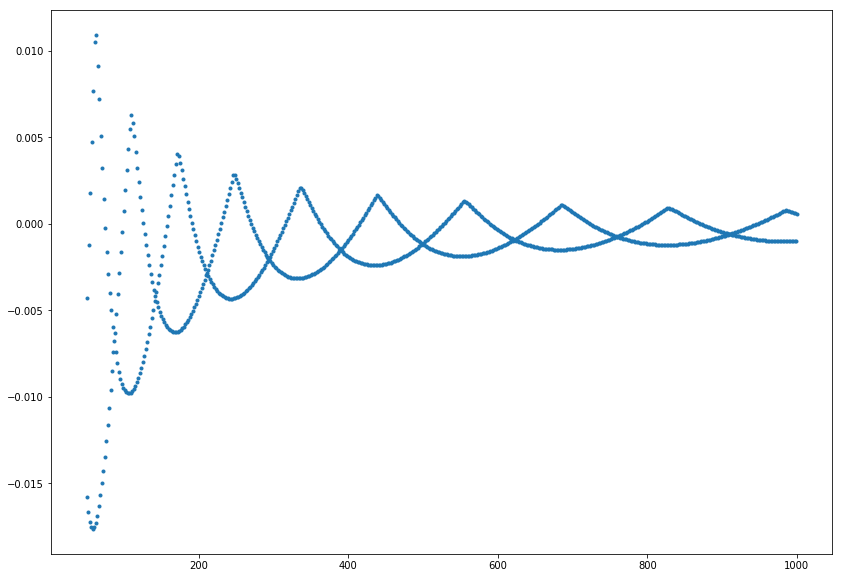

In [31]:
plt.figure(figsize=(14,10))
plt.plot(df_crr_2['num_steps'], df_crr_2['error_crr'], 'o', markersize=3)
plt.savefig('imgs/crr2ng')
plt.show()

In [30]:
lr_result_a = []
for n in range(50, 1001):
    pv = BinomialLROption(100, 95, 0.1, 0.2 ,n,{"sigma": 0.3, "is_call": False, "is_eu": False})
    lr_result_a.append(pv.price())

In [23]:
df_lr2 = pd.DataFrame.from_dict(lr_result_a)
df_lr_error2 = a - df_lr2
df_lr_error2.head()

,0
0,0.074249
1,-0.001487
2,0.071512
3,-0.001462
4,0.068977


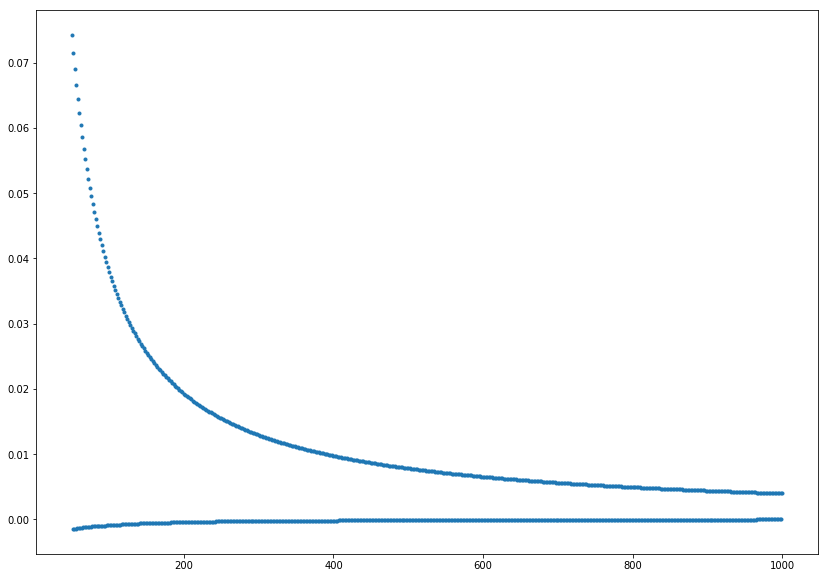

In [24]:
plt.figure(figsize=(14,10))
plt.plot(list(range(50,1001)), df_lr_error2, 'o', markersize=3)
plt.savefig('imgs/lr2.png')
plt.show()

## c

In [ ]:
# Stock Boundaries Calculation and Visualization
def CRRA(S0, K, T, r, sigma, n):
    crr_result=[] 

    option_value=np.zeros([n+1,n+1])
   
    stock_value=np.zeros([n+1,n+1])    

    
    delta = T/n
    u = np.exp(sigma*np.sqrt(delta))
    d = 1/u
    qu = (np.exp(r*delta)-d)/(u-d)
    qd = 1-qu
    j = n 
    for i in range(0,j+1):
        stock_value[j,i] = S0*(u**i)*(d**(j-i))
        option_value[j,i] = np.maximum(-stock_value[j,i]+K,0)
    for j in range(n-1,-1,-1):
        for i in range(j,-1,-1):
            pv = max(np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i]),K-S0*u**i*(d**(j-i)))
            option_value[j,i] = pv
            if pv == K-S0*u**i*(d**(j-i)):
                output = (j, S0*u**i*(d**(j-i)))
                crr_result.append(output)
    
    return crr_result

In [ ]:
Q2_a = CRRA(100, 95,0.2,0.1,0.3,100)
alist = list(Q2_a)

In [ ]:
b=[]
for i in alist:
    b.append(i[1])

In [ ]:
count = []
for i in range(1, 84):
    if i%2 == 0:
        locate = -1-0.25*i**2+i*85/2
    else:
        locate = -1-0.25*(i+1)**2+(i+1)*85/2-41+(i-3)/2
    count.append(locate)

In [ ]:
stock_boundary = [x for idx, x in enumerate(b) if idx in count]
bound = pd.DataFrame(stock_boundary)
ID = pd.DataFrame(list(range(99, 16, -1)))

In [ ]:
# Plot the stock boundaries
plt.plot(ID, bound)
plt.title("Stock Boundaries", fontsize = 20)
plt.xlabel("Number of Steps", fontsize = 15)
plt.ylabel("Stock Boundaries (Sf)", fontsize = 15)

## NO，because the stock price we calculate is not the real price that makes K-St = option value. More nodes in a step will make the estimation more accurate. N=100 may be small.

## When compared to the Black-Scholes price, we can see that the error calculated by Leisen and Reimer method  and Broadie and Detemple method is smoothly converged while the other method is not.

## d

In [43]:
result_BD = BD(100, 95, 0.2, 0.1, 0.3, 24, 501)

In [49]:
df_bd_d = pd.DataFrame.from_dict(result_BD)
df_bd_d['error_bd'] = a - df_bd_d["CRR"]


bd_n= df_bd_d.loc[[1,26,76,126,176,226],]
bd_n

,CRR,num_steps,error_bd
1,4.175442,25,-1.656436
26,3.858603,50,-1.339597
76,3.661591,100,-1.142585
126,3.568277,150,-1.049271
176,3.511445,200,-0.992439
226,3.473228,250,-0.954222


In [50]:
bd_m =df_bd_d.loc[[26,76,176,276,376,476],] 
bd_m

,CRR,num_steps,error_bd
26,3.858603,50,-1.339597
76,3.661591,100,-1.142585
176,3.511445,200,-0.992439
276,3.448948,300,-0.929942
376,3.410370,400,-0.891364
476,3.384786,500,-0.865780


In [52]:
bd = [2*b-a for a, b in zip(bd_n["CRR"], bd_m["CRR"])]
error_bd = bd - a
error_bd

array([1.02275783, 0.94557307, 0.84229254, 0.81061278, 0.79028951,
       0.7773378 ])

In [53]:
result_crra = CRRA(100, 95, 0.2, 0.1, 0.3, 24, 501)

In [54]:
df_crra_d = pd.DataFrame.from_dict(result_crra)
df_crra_d['error_crra'] = a - df_crra_d["CRR"]


crra_n= df_crra_d.loc[[1,26,76,126,176,226],]
crra_n

,CRR,num_steps,error_crra
1,2.558950,25,-0.039944
26,2.534785,50,-0.015778
76,2.518262,100,0.000744
126,2.524322,150,-0.005316
176,2.523211,200,-0.004205
226,2.516423,250,0.002583


In [55]:
crra_m =df_crra_d.loc[[26,76,176,276,376,476],] 
crra_m

,CRR,num_steps,error_crra
26,2.534785,50,-0.015778
76,2.518262,100,0.000744
176,2.523211,200,-0.004205
276,2.521405,300,-0.002399
376,2.519935,400,-0.000929
476,2.520199,500,-0.001193


In [56]:
crra = [2*b-a for a, b in zip(crra_n["CRR"], crra_m["CRR"])]
error_crra = crra - a
error_crra

array([-0.00838684, -0.01726603,  0.0091537 , -0.00051827, -0.00234723,
        0.00496877])

In [ ]:
result_lr2 = CRRA(100, 95, 0.2, 0.1, 0.3, 24, 501)

In [57]:
lr_result3 = []
for n in range(24, 505):
    pv = BinomialLROption(100, 95, 0.1, 0.2 ,n,{"sigma": 0.3, "is_call": False,"is_eu": False})
    lr_result3.append(pv.price())

In [60]:
df_lr2_d = pd.DataFrame.from_dict(lr_result3)
df_lr2_dd = a - df_lr2_d


lr2_n= df_lr2_d.loc[[27,77,127,177,227],]
lr2_n

,0
27,2.520493
77,2.519893
127,2.519590
177,2.519424
227,2.519315


In [61]:
lr2_m =df_lr2_d.loc[[77,177,277,377,477],] 
lr2_m

,0
77,2.519893
177,2.519424
277,2.519257
377,2.519179
477,2.519131


In [ ]:
numstep_n = [51 ,101, 151,201,251]
numstep_m = [101, 201, 301, 401 ,501]
df_step_n = pd.DataFrame.from_dict(numstep_n)
df_step_m = pd.DataFrame.from_dict(numstep_m)

In [62]:
lr2 = [(float(c)**2*a-float(d)**2*b)/(float(c)**2-float(d)**2) for a, b, c, d in zip(lr2_n[0], lr2_m[0],df_step_n[0],df_step_m[0])]
error_lr2 = lr2 - a
error_lr2

array([6.80967193e-04, 2.58965058e-04, 1.38730151e-04, 9.13656535e-05,
       6.35017578e-05])

## As the results show, the method by extrapolating with N and M steps give us more accurate option values than simply using a lattice with M timesteps with smaller error. Because the error depends on the number of steps M*N which is smaller than the original error.

## Q3

In [73]:
S0 =100
K = 100
B =95
r =0.1
T = 0.2
sigma =0.3

d1 = (np.log(S0 / K) + (r - 0 + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = (np.log(S0 / K) + (r - 0 - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
h1 = (np.log(B**2/(K*S0))+(r - 0 + 0.5*sigma**2)*T)/(sigma*T**0.5)
h2 = (np.log(B**2/(K*S0))+(r - 0 - 0.5*sigma**2)*T)/(sigma*T**0.5)

cdf_mean = 0.0
cdf_sd = 1.0

pv = S0*st.norm.cdf(d1, cdf_mean, cdf_sd)-K*np.exp(-r*T)*st.norm.cdf(d2, cdf_mean, cdf_sd)-(B/S0)**(1+2*r*sigma**(-2))*S0*st.norm.cdf(h1, cdf_mean, cdf_sd)+(B/S0)**(-1+2*r*sigma**(-2))*K*np.exp(-r*T)*st.norm.cdf(h2, cdf_mean, cdf_sd) 

pv

4.397502559962934

In [74]:
def crrb(s0, k, b, t, r, sigma, start, n):

    crr_result = []

    option_value = np.zeros([n + 1, n + 1])

    stock_value = np.zeros([n + 1, n + 1])

    for n in range(start, n + 1, 1):

        dt = t / n

        u = np.exp(sigma * np.sqrt(dt))

        d = 1 / u

        qu = (np.exp(r * dt) - d) / (u - d)

        qd = 1 - qu

        j = n

        for i in range(j + 1):

            stock_value[j, i] = s0 * u**i * d**(j - i)

            if stock_value[j, i] < b:
                option_value[j, i] = 0

            else:
                option_value[j, i] = np.maximum(stock_value[j, i] - k, 0)

        for j in range(n - 1, -1, -1):

            for i in range(j, -1, -1):

                stock_value[j, i] = s0 * u**i * d**(j - i)

                if stock_value[j, i] < b:
                    option_value[j, i] = 0

                else:
                    option_value[j, i] = np.exp(
                        -r * dt) * (qu * option_value[j + 1, i + 1] +
                                    qd * option_value[j + 1, i])

        su = min(list(x for x in stock_value[n] if x > b))
        sd = max(list(x for x in stock_value[n] if x < b))

        lbd = (su - b) / (su - sd)

        output = {'num_steps': n, 'CRRB': option_value[0, 0], 'lambda': lbd}

        crr_result.append(output)

    return (crr_result)


In [79]:
down_call = crrb(100,100,95,0.2, 0.1,0.3, 50, 200)
down_call

[{'num_steps': 50, 'CRRB': 4.670342933300808, 'lambda': 0.35603110180073033},
 {'num_steps': 51, 'CRRB': 4.65963521377126, 'lambda': 0.8673287936422432},
 {'num_steps': 52, 'CRRB': 4.619167064783679, 'lambda': 0.3828488387662774},
 {'num_steps': 53, 'CRRB': 4.608297195066957, 'lambda': 0.8934289549963857},
 {'num_steps': 54, 'CRRB': 4.569699438216058, 'lambda': 0.40912832731961446},
 {'num_steps': 55, 'CRRB': 4.558724666164771, 'lambda': 0.919031624982747},
 {'num_steps': 56, 'CRRB': 4.521852924565974, 'lambda': 0.4349006829421861},
 {'num_steps': 57, 'CRRB': 4.510820094180326, 'lambda': 0.9441642079710155},
 {'num_steps': 58, 'CRRB': 4.475545419658379, 'lambda': 0.4601941382467079},
 {'num_steps': 59, 'CRRB': 4.4644928969432796, 'lambda': 0.9688516814875964},
 {'num_steps': 60, 'CRRB': 4.43069968546672, 'lambda': 0.48503440312060014},
 {'num_steps': 61, 'CRRB': 4.419658897031768, 'lambda': 0.9931168867977039},
 {'num_steps': 62, 'CRRB': 5.125105356477499, 'lambda': 0.5094449690774275}

In [80]:
df_down_call = pd.DataFrame.from_dict(down_call)
df_down_call['error_crr'] =a - df_down_call["CRRB"]
df_down_call.head()

,CRRB,lambda,num_steps,error_crr
0,4.670343,0.356031,50,-2.151337
1,4.659635,0.867329,51,-2.140629
2,4.619167,0.382849,52,-2.100161
3,4.608297,0.893429,53,-2.089291
4,4.569699,0.409128,54,-2.050693


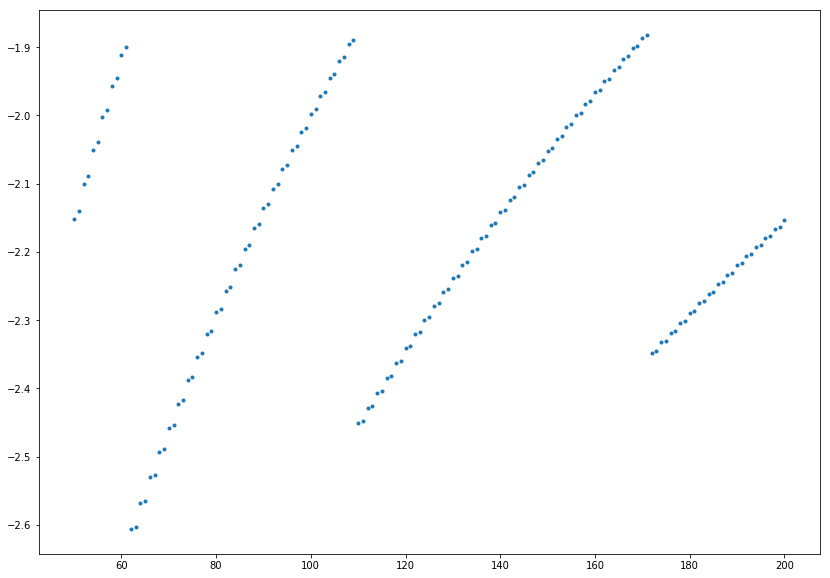

In [81]:
plt.figure(figsize=(14,10))
plt.plot(df_down_call['num_steps'], df_down_call['error_crr'], 'o', markersize=3)
plt.savefig('imgs/df_down_callng')
plt.show()

## b
### As the result shows, the barrier will be larger than the calculter result when lamba is small. When errors become larger, lambda will be closer to 0 and when erros become smaller, lamba will be closer to 1.

## C
### the way to improve the convergency to the correct value is to choose parameters more carefully.

## Q4

In [ ]:
def crrdb(s0, k, b, t, r, sigma, start, n):

    crr_result = []

    option_value = np.zeros([n + 1, n + 1])

    stock_value = np.zeros([n + 1, n + 1])

    for n in range(start, n + 1, 10):

        dt = t / n

        u = np.exp(sigma * np.sqrt(dt))

        d = 1 / u

        qu = (np.exp(r * dt) - d) / (u - d)

        qd = 1 - qu

        j = n

        for i in range(j + 1):

            stock_value[j, i] = s0 * u**i * d**(j - i)

            option_value[j, i] = np.maximum(stock_value[j, i] - k, 0)

        for j in range(n - 1, -1, -1):

            if j in [n / 5, 2 * n / 5, 3 * n / 5, 4 * n / 5]:

                for i in range(j, -1, -1):

                    stock_value[j, i] = s0 * u**i * d**(j - i)

                    if stock_value[j, i] < b:
                        option_value[j, i] = 0

                    else:
                        option_value[j, i] = np.exp(
                            -r * dt) * (qu * option_value[j + 1, i + 1] +
                                        qd * option_value[j + 1, i])

            else:

                for i in range(j, -1, -1):

                    stock_value[j, i] = s0 * u**i * d**(j - i)
                    option_value[j, i] = np.exp(
                        -r * dt) * (qu * option_value[j + 1, i + 1] +
                                    qd * option_value[j + 1, i])

        su = min(list(x for x in stock_value[n, :] if x > b))
        sd = max(list(x for x in stock_value[n, :] if x < b))

        lbd = (su - b) / (su - sd)

        output = {'num_steps': n, 'CRRDB': option_value[0, 0], 'lambda': lbd}

        crr_result.append(output)

    return (crr_result)

In [ ]:
down_call = crrb(100,100,95,0.2, 0.1,0.3, 50, 200)
down_call

9

1